# Import Modules

In [174]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.arima.model import ARIMA

# Import Data

In [33]:
hdb = pd.read_csv('./data_hdb/hdb.csv')

In [34]:
hdb

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2015-01-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70
1,2015-01-01,2015,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65
2,2015-01-01,2015,1,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64
3,2015-01-01,2015,1,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63
4,2015-01-01,2015,1,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,2014-12-01,2014,12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,73
826577,2014-12-01,2014,12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,73
826578,2014-12-01,2014,12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,77
826579,2014-12-01,2014,12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,70


## Get HDB With the Most Monthly Data Spread Over 1990-2020

### Group HDB by Blocks

In [35]:
hdb_groupby_blk = hdb.groupby(["town", "flat_type", "block", "street_name", "floor_area_sqm", "lease_commence_date"])

### Monthly Count

In [36]:
hdb_groupby_blk.size().reset_index(name="counts").sort_values("counts", ascending =False)

,town,flat_type,block,street_name,floor_area_sqm,lease_commence_date,counts
15478,JURONG WEST,3 ROOM,211,BOON LAY PL,65.0,1976,667
15457,JURONG WEST,3 ROOM,186,BOON LAY AVE,59.0,1975,618
15455,JURONG WEST,3 ROOM,185,BOON LAY AVE,59.0,1975,615
15468,JURONG WEST,3 ROOM,208,BOON LAY PL,65.0,1976,613
15475,JURONG WEST,3 ROOM,210,BOON LAY PL,65.0,1977,612
...,...,...,...,...,...,...,...
25081,SENGKANG,5 ROOM,117C,RIVERVALE DR,114.0,2000,1
25071,SENGKANG,5 ROOM,116A,RIVERVALE DR,114.0,2000,1
25065,SENGKANG,5 ROOM,114,RIVERVALE WALK,123.0,1998,1
25048,SENGKANG,5 ROOM,110,RIVERVALE WALK,122.0,1999,1


### Unique Monthly Count

In [37]:
hdb_groupby_blk.nunique("date").reset_index().sort_values("date", ascending = False)

,town,flat_type,block,street_name,floor_area_sqm,lease_commence_date,date,year,month,storey_range,flat_model,resale_price,remaining_lease
15478,JURONG WEST,3 ROOM,211,BOON LAY PL,65.0,1976,284,31,12,12,2,249,31
15455,JURONG WEST,3 ROOM,185,BOON LAY AVE,59.0,1975,284,31,12,11,2,231,31
15475,JURONG WEST,3 ROOM,210,BOON LAY PL,65.0,1977,277,31,12,11,2,237,31
15468,JURONG WEST,3 ROOM,208,BOON LAY PL,65.0,1976,275,31,12,10,2,237,31
15457,JURONG WEST,3 ROOM,186,BOON LAY AVE,59.0,1975,275,31,12,11,2,230,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,BUKIT BATOK,4 ROOM,329,BT BATOK ST 33,89.0,1986,1,1,1,1,1,1,1
24750,SENGKANG,4 ROOM,299A,COMPASSVALE ST,96.0,2001,1,1,1,1,1,1,1
24747,SENGKANG,4 ROOM,298D,COMPASSVALE ST,98.0,2001,1,1,1,1,1,1,1
24743,SENGKANG,4 ROOM,298B,COMPASSVALE ST,97.0,2001,1,1,1,1,1,1,1


### Best HDB Blk: JURONG WEST (3 ROOM) 211 BOON LAY PL 65.0 1976

In [38]:
jurong_211 = hdb[(hdb.town == "JURONG WEST") & 
                 (hdb.flat_type == "3 ROOM") & 
                 (hdb.block == "211") & 
                 (hdb.street_name == "BOON LAY PL") & 
                 (hdb.floor_area_sqm == 65.0) & 
                 (hdb.lease_commence_date == 1976)]

In [39]:
jurong_211

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
3005,2015-03-01,2015,3,JURONG WEST,3 ROOM,211,BOON LAY PL,01 TO 03,65.0,Improved,1976,262000.0,60
3010,2015-03-01,2015,3,JURONG WEST,3 ROOM,211,BOON LAY PL,10 TO 12,65.0,Improved,1976,288000.0,60
3013,2015-03-01,2015,3,JURONG WEST,3 ROOM,211,BOON LAY PL,19 TO 21,65.0,Improved,1976,291800.0,60
13933,2015-10-01,2015,10,JURONG WEST,3 ROOM,211,BOON LAY PL,13 TO 15,65.0,Improved,1976,260000.0,60
13941,2015-10-01,2015,10,JURONG WEST,3 ROOM,211,BOON LAY PL,10 TO 12,65.0,Improved,1976,280000.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
821480,2014-09-01,2014,9,JURONG WEST,3 ROOM,211,BOON LAY PL,16 TO 18,65.0,Improved,1976,268000.0,61
821494,2014-09-01,2014,9,JURONG WEST,3 ROOM,211,BOON LAY PL,04 TO 06,65.0,Improved,1976,302000.0,61
822996,2014-10-01,2014,10,JURONG WEST,3 ROOM,211,BOON LAY PL,10 TO 12,65.0,Improved,1976,292000.0,61
822998,2014-10-01,2014,10,JURONG WEST,3 ROOM,211,BOON LAY PL,19 TO 21,65.0,Improved,1976,295000.0,61


## Get Median Resale Price for Each Month

In [40]:
jurong_211_median = jurong_211.groupby("date").median("resale_price").reset_index()

In [41]:
jurong_211_median

,date,year,month,floor_area_sqm,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,1990.0,1.0,65.0,1976.0,25000.0,85.0
1,1990-02-01,1990.0,2.0,65.0,1976.0,22500.0,85.0
2,1990-03-01,1990.0,3.0,65.0,1976.0,25000.0,85.0
3,1990-04-01,1990.0,4.0,65.0,1976.0,29750.0,85.0
4,1990-05-01,1990.0,5.0,65.0,1976.0,30000.0,85.0
...,...,...,...,...,...,...,...
279,2019-11-01,2019.0,11.0,65.0,1976.0,217000.0,56.0
280,2020-02-01,2020.0,2.0,65.0,1976.0,210000.0,55.0
281,2020-07-01,2020.0,7.0,65.0,1976.0,230000.0,55.0
282,2020-08-01,2020.0,8.0,65.0,1976.0,225000.0,55.0


## Keep Only Resale Price and Month

In [42]:
jurong_211_median_drop = pd.DataFrame({"month":jurong_211_median.date, 
                                       "resale_price":jurong_211_median.resale_price})

## Save to CSV

In [43]:
jurong_211_median_drop.to_csv("./data_arima/jurong_211.csv", index = False)

# Start of ARIMA

## ARIMA 3 Parameters

p: the number of lag observations in the model; also known as the lag order.

d: the number of times that the raw observations are differenced; also known as the degree of differencing.

q: the size of the moving average window; also known as the order of the moving average.

source: https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp#:~:text=An%20autoregressive%20integrated%20moving%20average%2C%20or%20ARIMA%2C%20is%20a%20statistical,values%20based%20on%20past%20values.

# Import Data

In [46]:
df = pd.read_csv("./data_arima/jurong_211.csv", index_col="month", parse_dates=True)
df

,resale_price
month,
1990-01-01,25000.0
1990-02-01,22500.0
1990-03-01,25000.0
1990-04-01,29750.0
1990-05-01,30000.0
...,...
2019-11-01,217000.0
2020-02-01,210000.0
2020-07-01,230000.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284 entries, 1990-01-01 to 2020-09-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   resale_price  284 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


# Check Missing Data

There is a lot of missing data, for ARIMA to be a good predictor we need to more data

In [131]:
df.groupby(df.index.year).size()

month
1990    12
1991    11
1992     9
1993    11
1994    12
1995    11
1996    12
1997    12
1998    11
1999    11
2000     9
2001     9
2002     6
2003    10
2004    11
2005    10
2006    10
2007     9
2008    10
2009    10
2010    11
2011     8
2012     9
2013     7
2014     8
2015     3
2016     6
2017     8
2018     8
2019     6
2020     4
dtype: int64

# Fill Missing Data

In [138]:
from datetime import datetime
from dateutil import relativedelta
datetime_object = datetime.strptime("1990-01-01", "%Y-%m-%d")
datetime_object += relativedelta.relativedelta(months=32)
pd.to_datetime(datetime_object)

def to_dt(date_string):
    return datetime.strptime(str(date_string)[:10], "%Y-%m-%d")

def to_pd_dt(date_string):
    return pd.to_datetime(str(date_string)[:10])

date = to_dt(df.index[0])
print(date)
end_date = to_dt(df.index[-1])
while(date < end_date):
    try:
        df.loc[to_pd_dt(date)]
        date += relativedelta.relativedelta(months=1)
    except KeyError:
        a = df.loc[to_pd_dt(date - relativedelta.relativedelta(months=1))]["resale_price"]
        date_i = date + relativedelta.relativedelta(months=1)
        count = 1
        while count < 10:
            try:
                df.loc[to_pd_dt(date_i)]
                break
            except KeyError:
                count += 1
            date_i += relativedelta.relativedelta(months=1)
        
        
        b = df.loc[to_pd_dt(date_i)]["resale_price"]
        diff = b-a
        incre = diff/(count+1)
        while (count > 0):
            a += incre
            df.loc[to_pd_dt(date)] = a
            count -= 1
            date += relativedelta.relativedelta(months=1)
print(date)
df = df.sort_index(ascending = True)

1990-01-01 00:00:00
2020-09-01 00:00:00


In [139]:
df.groupby(df.index.year).size()

month
1990    12
1991    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020     9
dtype: int64

All data for each year is filled by left and right bound increment

2020 Data stops at 2020-09

## d-value

d-value = 0 -> not stationary

d-value = 1 -> good

d-value = 2 -> over differentiating (d-value = 1 is sufficient)

In [240]:
best_d_value = 1

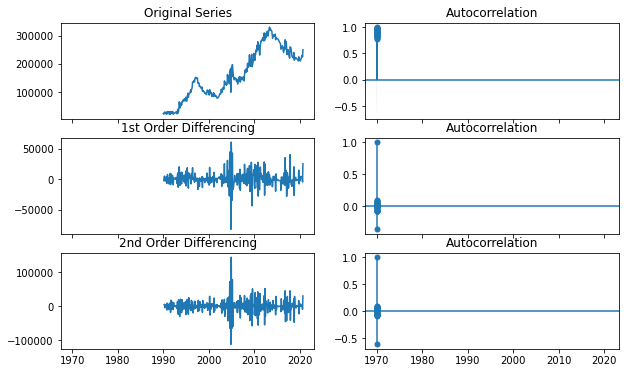

In [144]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

## p-value

### p value = 1 -> not very good prediction (almost like linear)

<AxesSubplot:xlabel='month', ylabel='predicted_mean'>

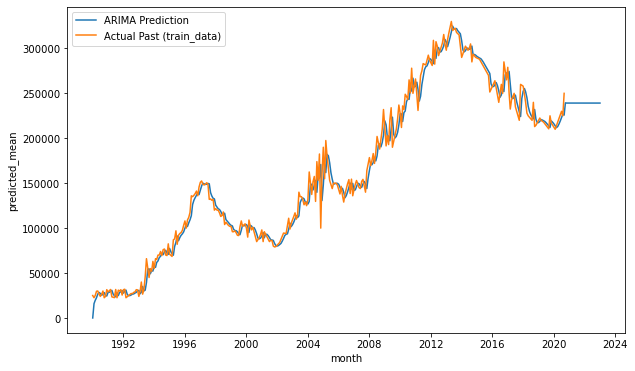

In [228]:
model = ARIMA(df, order=(1,1,1))
model_fit = model.fit()
sb.lineplot(data = model_fit.predict(end='2023'), label="ARIMA Prediction")
sb.lineplot(data = df.squeeze(), label="Actual Past (train_data)")

### p value = 10 -> not bad

<AxesSubplot:xlabel='month', ylabel='predicted_mean'>

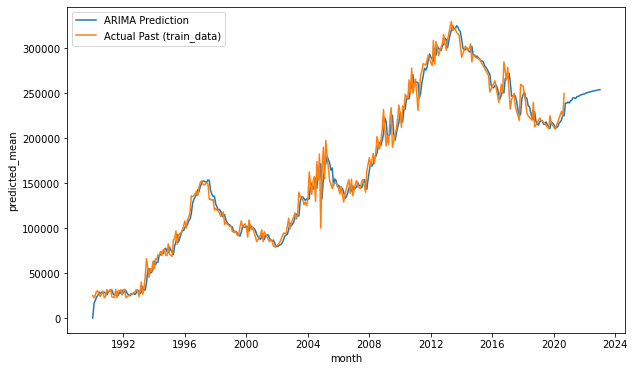

In [235]:
model = ARIMA(df, order=(10,1,1))
model_fit = model.fit()
sb.lineplot(data = model_fit.predict(end='2023'), label="ARIMA Prediction")
sb.lineplot(data = df.squeeze(), label="Actual Past (train_data)")

### p value = 50 -> better

<AxesSubplot:xlabel='month', ylabel='predicted_mean'>

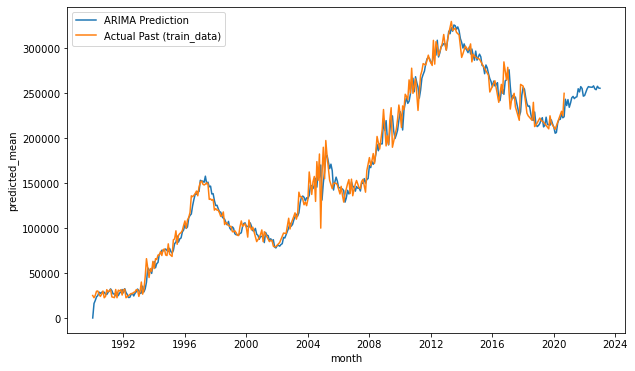

In [299]:
model = ARIMA(df, order=(50,1,1))
model_fit = model.fit()
sb.lineplot(data = model_fit.predict(end='2023'), label="ARIMA Prediction")
sb.lineplot(data = df.squeeze(), label="Actual Past (train_data)")

## q-value

### q-value = 1 -> not good (like linear)

<AxesSubplot:xlabel='month', ylabel='predicted_mean'>

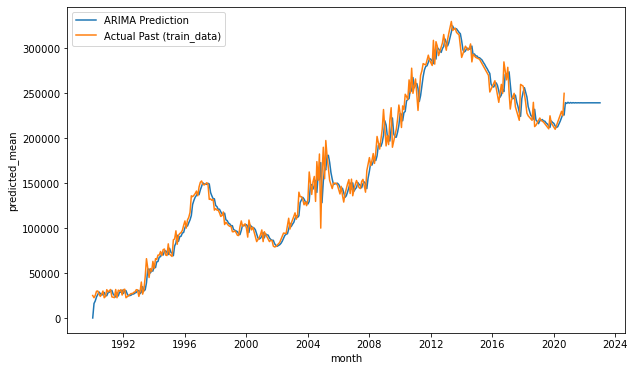

In [231]:
model = ARIMA(df, order=(1,1,1))
model_fit = model.fit()
sb.lineplot(data = model_fit.predict(end='2023'), label="ARIMA Prediction")
sb.lineplot(data = df.squeeze(), label="Actual Past (train_data)")

### q-value = 25 -> better

<AxesSubplot:xlabel='month', ylabel='predicted_mean'>

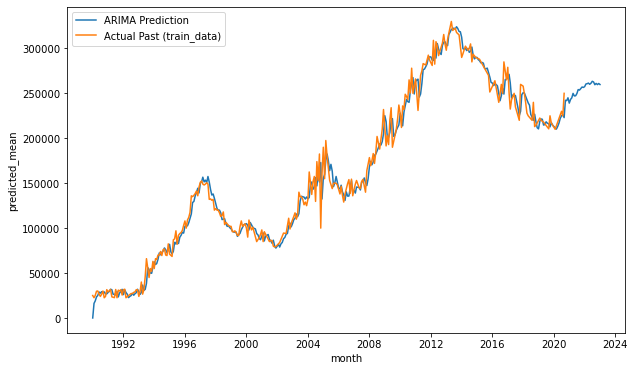

In [298]:
model = ARIMA(df, order=(1,1,25))
model_fit = model.fit()
sb.lineplot(data = model_fit.predict(end='2023'), label="ARIMA Prediction")
sb.lineplot(data = df.squeeze(), label="Actual Past (train_data)")

### q-value = 50 -> interesting wobble

<AxesSubplot:xlabel='month', ylabel='predicted_mean'>

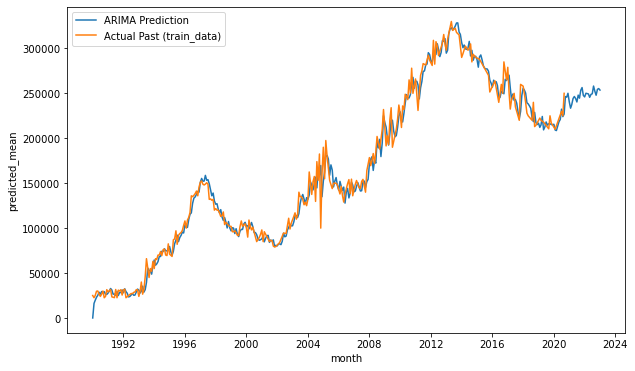

In [233]:
model = ARIMA(df, order=(1,1,50))
model_fit = model.fit()
sb.lineplot(data = model_fit.predict(end='2023'), label="ARIMA Prediction")
sb.lineplot(data = df.squeeze(), label="Actual Past (train_data)")

# R^2 & MSE

In [200]:
def r2(train, test):
    n = len(test.index)
    rss = mse(train,test)*n
    
    y_total = 0
    for i in test.index:
        y_total += test.loc[i]
    y_mean = y_total/n
    
    tss = 0
    for i in test.index:
        tss += (test.loc[i] - y_mean)**2
        
    return 1 - rss/tss

def mse(train, test):
    n = len(test.index)
    se = 0
    for i in test.index:
        se += (test.loc[i] - train.loc[i])**2
    return se/n

def rmse(train,test):
    return mse(train,test)**0.5

# Test Data
Source: https://www.propertyguru.com.sg/singapore-property-listing/hdb/jurong-west/boon-lay-place_103145/211/last-transacted-prices-and-insights

## Get Test Data

Web scrapping via beautiful soup does not work as the website return a 403 forbidden error.

Refer to `web_scrape_test_data.py` for scrapping script through selenium

## Import Test Data

In [192]:
test_data = pd.read_csv("./data_arima/test_data.csv")
test_data

,month,resale_price
0,2022-04-01,295000
1,2022-03-01,278000
2,2022-03-01,290000
3,2021-12-01,333800
4,2021-10-01,274000
5,2021-06-01,288000
6,2021-03-01,232000
7,2020-10-01,245000
8,2020-09-01,250000
9,2020-08-01,225000


## Group by Monthly Median Resale Price

In [193]:
test_data_median = test_data.groupby("month").median().reset_index()
test_data_median

,month,resale_price
0,2019-04-01,220000.0
1,2019-05-01,218000.0
2,2019-07-01,235000.0
3,2019-09-01,215000.0
4,2019-10-01,225000.0
5,2019-11-01,217000.0
6,2019-12-01,232000.0
7,2020-02-01,210000.0
8,2020-07-01,230000.0
9,2020-08-01,225000.0


## Save test_data_median to CSV

In [194]:
test_data_median.to_csv("./data_arima/test_data_median.csv", index=False)

## Read test_data_median

In [195]:
test_data = pd.read_csv("test_data_median.csv",index_col="month", parse_dates=True)
test_data

,resale_price
month,
2019-03-01,200800.0
2019-04-01,220000.0
2019-05-01,218000.0
2019-07-01,235000.0
2019-09-01,215000.0
2019-10-01,225000.0
2019-11-01,217000.0
2019-12-01,232000.0
2020-02-01,210000.0


# Plot ARIMA & test_data

R^2: 0.4884970802970413
MSE: 553708667.4688735
RMSE: 23531.0150114455


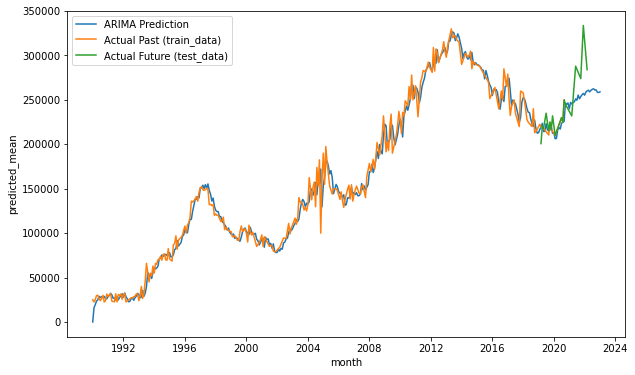

In [201]:
model = ARIMA(df, order=(44,1,1))
model_fit = model.fit()
a = model_fit.predict(end='2023')
ax = sb.lineplot(data = a, label="ARIMA Prediction")

b = df.squeeze()
ax = sb.lineplot(data = b, label="Actual Past (train_data)")

c = test_data.squeeze() 
ax = sb.lineplot(data = c, label="Actual Future (test_data)")

print(f"R^2: {r2(a,c)}")
print(f"MSE: {mse(a, c)}")
print(f"RMSE: {rmse(a,c)}")

## Find Best p-value

In [203]:
p_value_list = []
r2_list = []
mse_list = []
rmse_list = []

print("p-value progess: ")
for i in range(1, 45+1):
    print(i, end= ' ')
    model = ARIMA(df, order=(i,1,1))
    model_fit = model.fit()
    a = model_fit.predict(end='2023')
    c = test_data.squeeze() 
  
    p_value_list.append(i)
    r2_list.append(r2(a,c))
    mse_list.append(mse(a, c))
    rmse_list.append(rmse(a,c))

pdf = pd.DataFrame({"p_value": p_value_list, "r2": r2_list, "mse": mse_list, "rmse": rmse_list})
pdf.to_csv("./data_arima/p_value.csv", index=False)

p-value 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 

In [205]:
pdf

,p_value,r2,mse,rmse
0,1,0.158804,9.106058e+08,30176.245603
1,2,0.162936,9.061327e+08,30102.038125
2,3,0.163011,9.060517e+08,30100.693202
3,4,0.154263,9.155212e+08,30257.581216
4,5,0.296422,7.616320e+08,27597.680613
5,6,0.320959,7.350709e+08,27112.190551
6,7,0.363372,6.891587e+08,26251.832662
7,8,0.294991,7.631812e+08,27625.733841
8,9,0.300487,7.572320e+08,27517.848956
9,10,0.343784,7.103628e+08,26652.631518


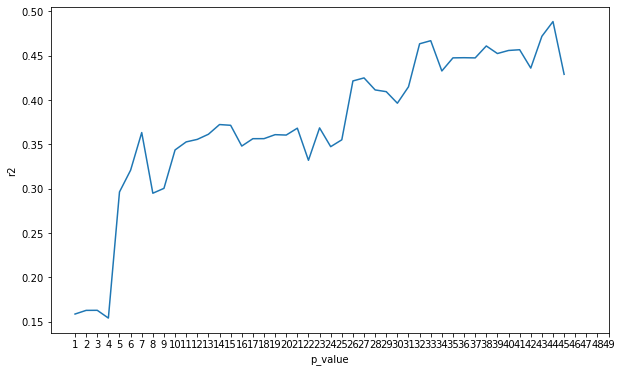

In [206]:
sb.lineplot(x= "p_value", y="r2", data = pdf)
plt.xticks(range(1,50))
plt.show()

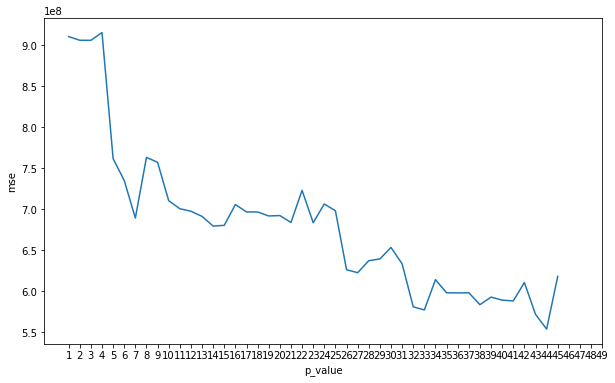

In [237]:
sb.lineplot(x= "p_value", y="mse", data = pdf)
plt.xticks(range(1,50))
plt.show()

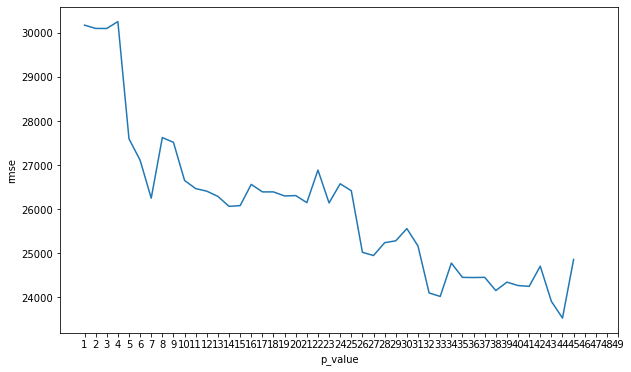

In [238]:
sb.lineplot(x= "p_value", y="rmse", data = pdf)
plt.xticks(range(1,50))
plt.show()

### Best p-value: 44

In [207]:
best_p_value = 44

In [208]:
pdf.iloc[pdf.r2.idxmax()].p_value

44.0

In [209]:
pdf.iloc[pdf.mse.idxmin()].p_value

44.0

In [210]:
pdf.iloc[pdf.rmse.idxmin()].p_value

44.0

# Find Best q-value based on p-value

In [211]:
q_value_list = []
r2_list = []
mse_list = []
rmse_list = []

print("q-value progess:")
for i in range(1, 45+1):
    print(i, end= ' ')
    model = ARIMA(df, order=(best_p_value,1,i))
    model_fit = model.fit()
    a = model_fit.predict(end='2023')
    c = test_data.squeeze() 
  
    q_value_list.append(i)
    r2_list.append(r2(a,c))
    mse_list.append(mse(a, c))
    rmse_list.append(rmse(a,c))

qdf = pd.DataFrame({"q_value": p_value_list, "r2": r2_list, "mse": mse_list, "rmse": rmse_list})
qdf.to_csv("./data_arima/q_value.csv", index=False)

q-value progess: 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 

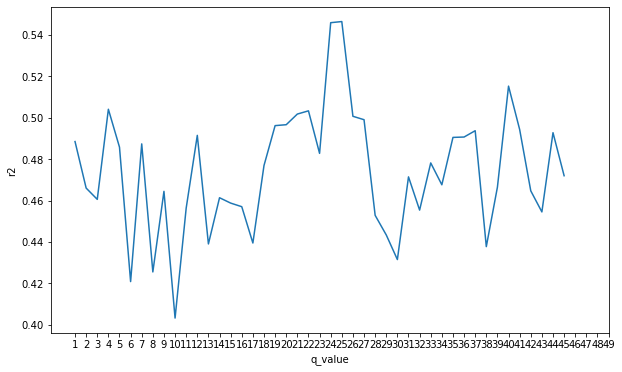

In [212]:
sb.lineplot(x= "q_value", y="r2", data = qdf)
plt.xticks(range(1,50))
plt.show()

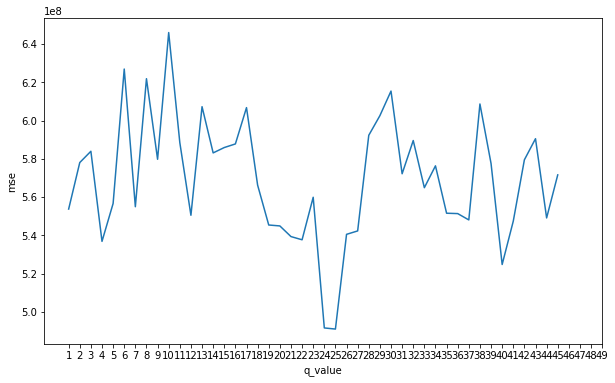

In [239]:
sb.lineplot(x= "q_value", y="mse", data = qdf)
plt.xticks(range(1,50))
plt.show()

### best q-value:

In [217]:
best_q_value = 25

In [218]:
qdf.iloc[qdf.r2.idxmax()].q_value

25.0

In [219]:
qdf.iloc[qdf.mse.idxmin()].q_value

25.0

In [220]:
qdf.iloc[qdf.rmse.idxmin()].q_value

25.0

## R^2 and MSE on best model

R^2: 0.4927809816279799
MSE: 549071287.6883248
RMSE: 23432.270220538274


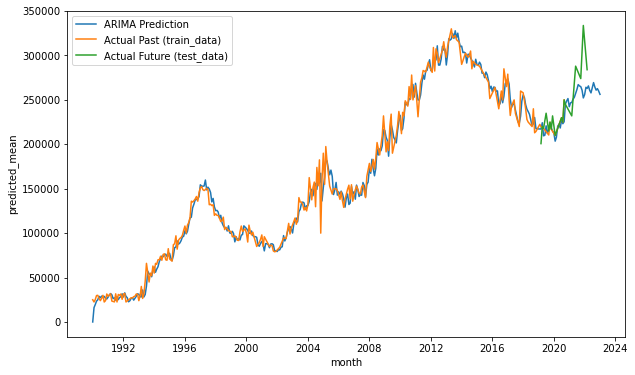

In [241]:
model = ARIMA(df, order=(best_p_value, best_d_value ,best_q_value))
model_fit = model.fit()
a = model_fit.predict(end='2023')
ax = sb.lineplot(data = a, label="ARIMA Prediction")

b = df.squeeze()
ax = sb.lineplot(data = b, label="Actual Past (train_data)")

c = test_data.squeeze() 
ax = sb.lineplot(data = c, label="Actual Future (test_data)")

print(f"R^2: {r2(a,c)}")
print(f"MSE: {mse(a, c)}")
print(f"RMSE: {rmse(a,c)}")

## Zoom Into Range 2018 - 2023 + Colour Code Each Year of the Test Data

2019 test_data
R^2: -0.08703256116523739
MSE: 108657057.23267421
RMSE: 10423.869590160566

2020 test_data
R^2: 0.36316647475004926
MSE: 131187706.20148985
RMSE: 11453.72019046606

2021 test_data
R^2: -0.49787237564689213
MSE: 1978401067.7972324
RMSE: 44479.2206293819



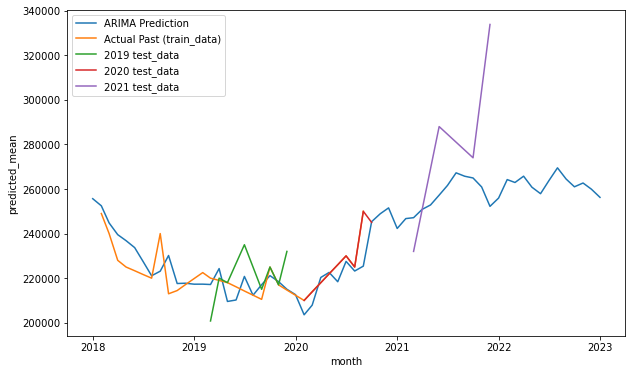

In [236]:
model = ARIMA(df, order=(best_p_value, best_d_value, best_q_value))
model_fit = model.fit()
a = model_fit.predict(start= '2018', end='2023')
ax = sb.lineplot(data = a, label="ARIMA Prediction")

ax = sb.lineplot(data = df[df.index > '2018'].squeeze(), label="Actual Past (train_data)")

year_list = []
r2_list = []
mse_list = []
rmse_list = []
for year in range(2019, 2022):
    test_data_year = test_data.loc[str(year)].squeeze()
    ax = sb.lineplot(data = test_data_year, label=f"{year} test_data")
    
    r2_value = r2(a,test_data_year)
    mse_value = mse(a,test_data_year)
    rmse_value = rmse(a,test_data_year)
    
    print(f"{year} test_data")
    print(f"R^2: {r2_value}")
    print(f"MSE: {mse_value}")
    print(f"RMSE: {rmse_value}\n")
    
    year_list.append(year)
    r2_list.append(r2_value)
    mse_list.append(mse_value)
    rmse_list.append(rmse_value)
    
    
year_df = pd.DataFrame({"year": year_list, "r2": r2_list, "mse": mse_list, "rmse": rmse_list})

In [219]:
year_df

,year,r2,mse,rmse
0,2019,-0.185642,1.185139e+08,10886.406887
1,2020,0.373276,1.291051e+08,11362.440884
2,2021,-0.477179,1.951069e+09,44170.908144


## MSE & RMSE

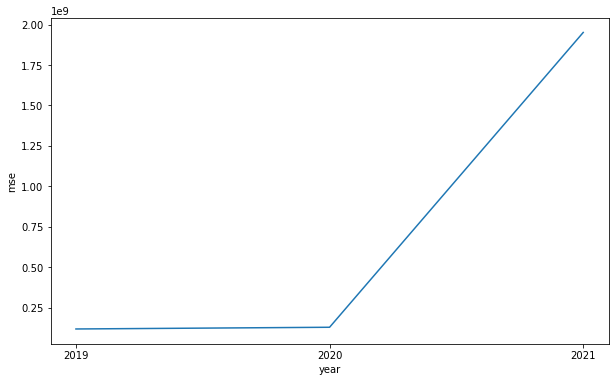

In [221]:
sb.lineplot(x= "year", y="mse", data = year_df)
plt.xticks(range(2019,2022))
plt.show()

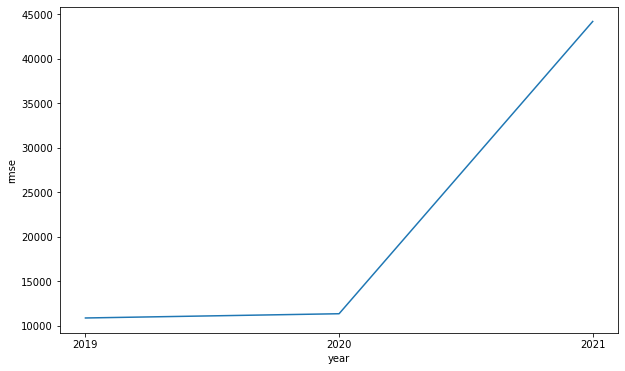

In [222]:
sb.lineplot(x= "year", y="rmse", data = year_df)
plt.xticks(range(2019,2022))
plt.show()